Code to analyze the database from Global Forest Watch. To calculate deforestation, the organization only takes into account the tree cover loss superior to 30% canopy cover.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Tree cover loss > 30% canopy cover

In [2]:
df = pd.read_csv('deforestacion_municipal_2001_2017_mas50.csv', thousands=',')
df

,area,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,TOTAL 2001-2017
0,Mexico_Aguascalientes_Aguascalientes,3,0,0,1,2,0,2,0,1,1,0,0,0,0,0,0,0.0,10
1,Mexico_Aguascalientes_Asientos,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
2,Mexico_Aguascalientes_Calvillo,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0,2
3,Mexico_Aguascalientes_Cosío,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
4,Mexico_Aguascalientes_Jesús María,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
5,Mexico_Aguascalientes_Pabellón de Arteaga,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
6,Mexico_Aguascalientes_Rincón de Romos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
7,Mexico_Aguascalientes_San José de Gracia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
8,Mexico_Aguascalientes_Tepezalá,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
9,Mexico_Baja California Sur_Comondú,20,4,5,16,2,5,1,4,4,1,0,3,0,0,0,0,0.0,65


Separate the name of the states and the municipalities.

In [3]:
df['state'] = df['area'].str.extract('Mexico_(.*)_.*')
df.head()

,area,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,TOTAL 2001-2017,state
0,Mexico_Aguascalientes_Aguascalientes,3,0,0,1,2,0,2,0,1,1,0,0,0,0,0,0,0.0,10,Aguascalientes
1,Mexico_Aguascalientes_Asientos,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,Aguascalientes
2,Mexico_Aguascalientes_Calvillo,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0,2,Aguascalientes
3,Mexico_Aguascalientes_Cosío,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,Aguascalientes
4,Mexico_Aguascalientes_Jesús María,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,Aguascalientes


In [4]:
df['mun'] = df['area'].str.extract('Mexico_.*_(.*)')
df.head()

,area,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,TOTAL 2001-2017,state,mun
0,Mexico_Aguascalientes_Aguascalientes,3,0,0,1,2,0,2,0,1,...,0,0,0,0,0,0,0.0,10,Aguascalientes,Aguascalientes
1,Mexico_Aguascalientes_Asientos,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,1,Aguascalientes,Asientos
2,Mexico_Aguascalientes_Calvillo,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0.0,2,Aguascalientes,Calvillo
3,Mexico_Aguascalientes_Cosío,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,Aguascalientes,Cosío
4,Mexico_Aguascalientes_Jesús María,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,1,Aguascalientes,Jesús María


In [5]:
df1 = df[['state', 'mun', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', 'TOTAL 2001-2017']]

In [6]:
df1

,state,mun,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,TOTAL 2001-2017
0,Aguascalientes,Aguascalientes,3,0,0,1,2,0,2,0,1,1,0,0,0,0,0,0,0.0,10
1,Aguascalientes,Asientos,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
2,Aguascalientes,Calvillo,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0,2
3,Aguascalientes,Cosío,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
4,Aguascalientes,Jesús María,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
5,Aguascalientes,Pabellón de Arteaga,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
6,Aguascalientes,Rincón de Romos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
7,Aguascalientes,San José de Gracia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1
8,Aguascalientes,Tepezalá,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
9,Baja California Sur,Comondú,20,4,5,16,2,5,1,4,4,1,0,3,0,0,0,0,0.0,65


In [7]:
df1.dtypes

state               object
mun                 object
2001                 int64
2002                 int64
2003                 int64
2004                 int64
2005                 int64
2006                 int64
2007                 int64
2008                 int64
2009                 int64
2010                 int64
2011                 int64
2012                 int64
2013                 int64
2014                 int64
2015                 int64
2016                 int64
2017               float64
TOTAL 2001-2017      int64
dtype: object

Deforestation per munipality between 2011 - 2017 in descending order.

In [8]:
df_mun = df1.sort_values(by='TOTAL 2001-2017', ascending= False) 

In [9]:
df_mun

,state,mun,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,TOTAL 2001-2017
19,Campeche,Carmen,8065,8353,19967,6496,19588,6501,11638,9471,13647,6830,4929,9739,12584,10715,14599,26278,23721.0,213121
22,Campeche,Hopelchén,4659,5093,6338,9935,5481,9440,12110,9566,18029,5208,5143,11798,12252,6167,16241,6897,23261.0,167619
20,Campeche,Champotón,7075,6507,9319,7710,6884,6042,9637,9571,16634,6170,4975,7241,13670,7646,8125,19685,18895.0,165787
86,Chiapas,Ocosingo,5443,3695,7313,5774,8147,6242,12290,8391,12214,10749,6345,9491,10212,10104,10086,20201,14496.0,161191
1237,Quintana Roo,Othón P. Blanco,3991,7894,5899,6382,7935,3497,9345,11959,12968,9988,13072,8446,12913,7194,7345,9452,19792.0,158072
1233,Quintana Roo,Felipe Carrillo Puerto,4751,12139,5734,5145,6333,2540,4469,5619,8298,4422,10008,4771,5259,4435,5867,4204,6579.0,100573
978,Oaxaca,Dist. Juchitan,4976,3552,3412,4886,8066,4187,8046,5600,4549,3354,4737,3269,4042,3996,2684,6021,5358.0,80735
1235,Quintana Roo,José María Morelos,3059,6067,5864,2434,4889,1738,2962,5524,7531,1943,3794,1792,4624,1592,8988,1494,4411.0,68706
1236,Quintana Roo,Lázaro Cárdenas,1001,1575,1134,910,1203,18275,423,1499,9839,641,8463,801,1316,1043,3828,1209,2885.0,56046
982,Oaxaca,Dist. Mixe,2202,1949,1651,1765,3425,2564,3261,3033,2576,2082,3057,2501,3365,2311,1883,4541,5784.0,47952


In [10]:
df_mun.to_csv('deforestation_per_year.csv', index=False)

Create a bar chart on Hopelchén

In [22]:
hopelchen = df_mun.loc[df_mun['mun'] == 'Hopelchén']
hopelchen

,state,mun,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,TOTAL 2001-2017
22,Campeche,Hopelchén,4659,5093,6338,9935,5481,9440,12110,9566,18029,5208,5143,11798,12252,6167,16241,6897,23261.0,167619


In [25]:
x_pos = [i for i, _ in enumerate(hopelchen)]

TypeError: <lambda>() missing 1 required positional argument: 'height'

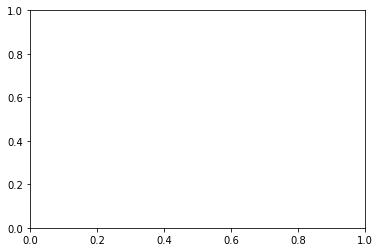

In [26]:
plt.bar(x_pos)

Deforestation per munipality in 2017

In [12]:
df1.sort_values(by='2017', ascending= False)

,state,mun,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,TOTAL 2001-2017
19,Campeche,Carmen,8065,8353,19967,6496,19588,6501,11638,9471,13647,6830,4929,9739,12584,10715,14599,26278,23721.0,213121
22,Campeche,Hopelchén,4659,5093,6338,9935,5481,9440,12110,9566,18029,5208,5143,11798,12252,6167,16241,6897,23261.0,167619
1237,Quintana Roo,Othón P. Blanco,3991,7894,5899,6382,7935,3497,9345,11959,12968,9988,13072,8446,12913,7194,7345,9452,19792.0,158072
20,Campeche,Champotón,7075,6507,9319,7710,6884,6042,9637,9571,16634,6170,4975,7241,13670,7646,8125,19685,18895.0,165787
86,Chiapas,Ocosingo,5443,3695,7313,5774,8147,6242,12290,8391,12214,10749,6345,9491,10212,10104,10086,20201,14496.0,161191
1233,Quintana Roo,Felipe Carrillo Puerto,4751,12139,5734,5145,6333,2540,4469,5619,8298,4422,10008,4771,5259,4435,5867,4204,6579.0,100573
982,Oaxaca,Dist. Mixe,2202,1949,1651,1765,3425,2564,3261,3033,2576,2082,3057,2501,3365,2311,1883,4541,5784.0,47952
978,Oaxaca,Dist. Juchitan,4976,3552,3412,4886,8066,4187,8046,5600,4549,3354,4737,3269,4042,3996,2684,6021,5358.0,80735
92,Chiapas,Palenque,1075,1003,1093,1556,1841,911,1976,1452,2119,1569,990,1587,2932,2952,2757,3930,4431.0,34173
1235,Quintana Roo,José María Morelos,3059,6067,5864,2434,4889,1738,2962,5524,7531,1943,3794,1792,4624,1592,8988,1494,4411.0,68706


Deforestation per state.

In [13]:
df2 = df1.groupby('state')['TOTAL 2001-2017'].sum()

In [14]:
df2

state
Aguascalientes             17
Baja California         13251
Baja California Sur       817
Campeche               604563
Chiapas                519983
Chihuahua               19112
Coahuila                12358
Colima                   4713
Distrito Federal          131
Durango                 19406
Guanajuato               1277
Guerrero                92125
Hidalgo                 51840
Jalisco                 33578
Michoacán               64693
Morelos                   707
México                   6123
Nayarit                 18333
Nuevo León              47969
Oaxaca                 288381
Puebla                  43810
Querétaro                2558
Quintana Roo           445147
San Luis Potosí         59307
Sinaloa                 40654
Sonora                   8640
Tabasco                105089
Tamaulipas             116551
Tlaxcala                  962
Veracruz               361167
Yucatán                414452
Zacatecas                 605
Name: TOTAL 2001-2017, dtype: int6

In [15]:
df1.groupby('state')['2017'].sum()

state
Aguascalientes             0.0
Baja California          320.0
Baja California Sur        0.0
Campeche               70695.0
Chiapas                50757.0
Chihuahua               1989.0
Coahuila                  45.0
Colima                   453.0
Distrito Federal           2.0
Durango                 1399.0
Guanajuato                35.0
Guerrero                8181.0
Hidalgo                 3490.0
Jalisco                 4202.0
Michoacán               5924.0
Morelos                   51.0
México                   623.0
Nayarit                 1908.0
Nuevo León              1623.0
Oaxaca                 30965.0
Puebla                  4057.0
Querétaro                105.0
Quintana Roo           35511.0
San Luis Potosí         4855.0
Sinaloa                  838.0
Sonora                   682.0
Tabasco                13947.0
Tamaulipas              5823.0
Tlaxcala                  50.0
Veracruz               25019.0
Yucatán                25237.0
Zacatecas                  1.0
Na

# Calculate how many hectares of Hopelchén's total territory have been deforested

Hopelchén has 7956.7 km2, according to official data http://www.inafed.gob.mx/work/enciclopedia/EMM04campeche/municipios/04006a.html
First convert km2 to hectares and then calculate how much it represents from Hopelchen's territory

In [16]:
7956.7 * 100

795670.0

In [17]:
167619 * 100 / 795670.0

21.066396873075522